# Comparison of GPR, SVR
- based on results of `SVR_Grid_Search.ipynb` and `GPR_Grid_Search.ipynb`

In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd 
plt.style.use(plt.style.available[11])

In [4]:
with open('nn_cv_results/grid_search_4.pkl', 'rb') as f:
    nn_results = pickle.load(f)

svr_results = pd.read_csv('svr_cv_results/grid_search.csv')
gpr_results = pd.read_csv('gpr_cv_results/grid_search.csv')

In [5]:
scores = []
pairs = []
stds = []

best_nn_idx = np.argmax(nn_results['mean_test_score'])
nn_score = nn_results['mean_test_score'][best_nn_idx]
nn_params = nn_results['params'][best_nn_idx]
nn_std = nn_results['std_test_score'][best_nn_idx]
print(nn_score, nn_std)
print(nn_params)

best_svr_idx = np.argmin(svr_results['Mean Squared Error'])
svr_score = -svr_results['Mean Squared Error'][best_svr_idx]
svr_params = svr_results['Params (C, ϵ, tol)'][best_svr_idx]
svr_std = svr_results['Standard Deviation'][best_svr_idx]
print(svr_score, svr_std)
print(svr_params)

best_gpr_idx = np.argsort(gpr_results['Mean Squared Error'])[3]
gpr_score = -gpr_results['Mean Squared Error'][best_gpr_idx]
gpr_params = gpr_results['Params (lr, epochs)'][best_gpr_idx]
gpr_std = gpr_results['Standard Deviation'][best_gpr_idx]
gpr_uncertainty = gpr_results['Mean Uncertainty'][best_gpr_idx]
print(gpr_score, gpr_std)
print(gpr_params)

-0.0059205167926847935 0.0003183776830298529
{'batch_size': 256, 'callbacks__lr_scheduler__gamma': 0.95, 'module__activation': LeakyReLU(negative_slope=0.01), 'module__n_hidden': 4, 'module__n_neurons': 32, 'optimizer': <class 'torch.optim.adam.Adam'>, 'optimizer__lr': 0.001, 'train_split': functools.partial(<function _make_split at 0x0000017815CA98A0>, valid_ds=<skorch.dataset.Dataset object at 0x0000017815CEA570>)}
-0.0045769514676351 0.0002371466909473
(2.5, 0.01, 0.001)
-0.0045002473837631 0.0001874513620904
(1.0, 50)


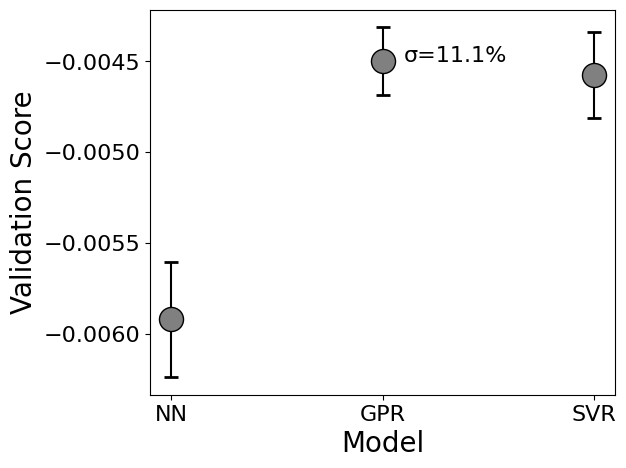

In [7]:
fig, ax = plt.subplots(figsize=(6,5))
ax.set_axisbelow(True)
ax.errorbar(0, nn_score, yerr=nn_std, color='k', capsize=5, fmt='.', zorder=1, capthick=2)
ax.errorbar(1, gpr_score, yerr=gpr_std,fmt='o', color='k', capsize=5, zorder=1, capthick=2)
ax.errorbar(2, svr_score, yerr=svr_std,fmt='o', color='k', capsize=5, zorder=1, capthick=2)
ax.scatter(0, nn_score, s=300, marker='o', color='gray', edgecolors='k', zorder=2)
ax.scatter(1, gpr_score, s=300, marker='o', color='gray', edgecolors='k', zorder=2)
ax.text(1.1, gpr_score, 'σ={:.1f}%'.format(gpr_uncertainty), fontsize=16, color='k')
ax.scatter(2, svr_score, s=300, marker='o', color='gray', edgecolors='k', zorder=2)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['NN', 'GPR', 'SVR'])
ax.tick_params(axis='both', labelsize=16)
ax.set_ylabel('Validation Score', fontsize=20)
ax.set_xlabel('Model', fontsize=20)

import os
os.makedirs('plots', exist_ok=True)

fig.savefig('plots/grid_search_comp.jpeg', dpi=300, bbox_inches='tight')
fig.savefig('plots/grid_search_comp.eps', dpi=300, bbox_inches='tight')